In [23]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import csv

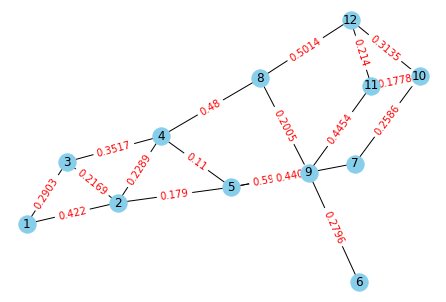

In [24]:
#Lets create the graph with networkx
#first, we create a andas data frame with the information from edges.csv file
edges = pd.read_csv('edges.csv', delimiter=',',header=5, names=['ID1','ID2','WEIGHT'])
#Second, we create de graph object by calling the function nx.from_pandas_edglist, assigning the atribute to the column weight
G = nx.from_pandas_edgelist(edges, source='ID1', target='ID2', edge_attr='WEIGHT')
#Now, we are ready to upload the info for every node:
nodes = pd.read_csv('nodes.csv', sep=',',header=7,names=['ID','x','y','heuristic_cost'])#read the data from nodes.csv
nodes=nodes.set_index('ID')#change the index column to ID column
data = nodes.to_dict('index').items()#convert the data frame to a dict_items object
#finally we add the info to the graph
G.add_nodes_from(data)
#now we can visualize our graph
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues,pos=pos)
edge_labels = nx.get_edge_attributes(G,'WEIGHT') # key is edge, pls check for your case
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} # use this to modify the tuple keyed dict if it has > 2 elements, else ignore
nx.draw_networkx_edge_labels(G,edge_labels=formatted_edge_labels,font_color='red',pos=pos)
plt.show()

In [25]:
#Now lets try writing the code for A*:
OPEN=[]#lets create the empty list OPEN
CLOSED=[]#lets create the emplty list closed
past_cost={}#array with the minimum cost so far to reach goal node from start node
#Lets initialize the OPEN list with the first node
search_tree=list()#link for each node to the node preceding in the shortest path found so far from start node to that node
#Lets initialize the OPEN list with the first node
OPEN.append({'node':1,'est_total_cost':G.nodes[1]['heuristic_cost']})
#Lets initialize the past cost to 0 for node 1, and to inf for every other node
GOAL=12#Lets initialize the goal node
PATH=[]
for element in list(G.nodes()):
    past_cost[element]=1000000000000
past_cost[1]=0
while bool(OPEN):#meanwhile the OPEN close is not empty
    current=OPEN[0]['node']#Assign the first node id in OPEN to current
    #print('current'+str(current))
    OPEN.pop(0)#Remove the first element from OPEN
    #print(OPEN)
    CLOSED.append(current)
    PATH.append(current)
    if current==GOAL:
        print("SUCCESS!")
        print(PATH)
        break
       
    
    for element in G.neighbors(current):#check the neighbors of the current node
        #print('vecino'+str(element))
        if element in CLOSED:#check if the element is in the closed list
            continue
        tentative_cost=past_cost[current]+G.get_edge_data(current,element)['WEIGHT']#calculate the tentative cost
        if element in CLOSED and tentative_cost<past_cost(element):
            CLOSE.remove(element)
        if element in OPEN and tentative_cost<past_cost(element):
            OPEN.remove(element)#remove the element from OPEN list
        if element not in OPEN and element not in CLOSED:
            est_total_cost=past_cost[element]+G.nodes[element]['heuristic_cost']#calculate the estimated total cost
            OPEN.append({'node':element,'est_total_cost':est_total_cost})##add the neigbor to OPEN list
            OPEN=sorted(OPEN, key=lambda x:x['est_total_cost'])#sort the open list by the total cost from lowest to highest
#Lets write the reulting path to a csv file
with open('path.csv', 'w') as file:
    writer=csv.writer(file)
    writer.writerow(PATH)
    
  

SUCCESS!
[1, 2, 5, 7, 10, 12]
